In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  # For accuracy, classification report, and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Loading the breast cancer dataset
data = pd.read_csv("breast_cancer_data.csv")

In [4]:
# Displaying the first few rows of the dataset (optional for better understanding of data)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Checking for any missing values in the dataset
print(data.isnull().sum())  # Summarize the number of missing values in each column

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:
# Separating features (x) and the target variable (y)
x = data.iloc[:, 0:30]  # First 30 columns as features
y = data['target']  # Assuming 'target' is the column that holds the classification labels

In [12]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Creating the logistic regression model
log = LogisticRegression(max_iter=200)  # Increased max_iter to ensure convergence
log.fit(x_train, y_train)  # Fitting the model with the training data

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [16]:
# Making predictions on the test data
predict = log.predict(x_test)

In [18]:
# Creating a DataFrame to compare actual vs predicted values
diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predict})

In [20]:
# Displaying the first few rows of the comparison DataFrame
print(diff.head())

     Actual Value  Predicted Value
204             1                1
70              0                0
131             0                0
431             1                1
540             1                1


In [22]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, predict)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.956140350877193


In [24]:
# Generating a classification report (precision, recall, F1-score, etc.)
class_report = classification_report(y_test, predict)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [26]:
# Generating the confusion matrix to evaluate classification performance
cm = confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[39  4]
 [ 1 70]]


In [28]:
# Visualizing the confusion matrix using Seaborn (optional for better insight)
import seaborn as sns
import matplotlib.pyplot as plt

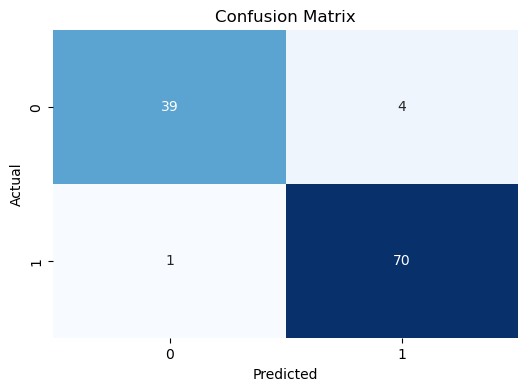

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()